Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Daniil Krechko | 12149099 | 30.03.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; The Vanishing Gradient Problem (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer<br>
<b>Date:</b> 21-03-2023

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u2.set_seed(17)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>17</code> as seed.
</div>

In [2]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from typing import Dict, Sequence

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

# Check minimum versions.
u2.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.23.5 (✓)
Installed pandas version: 1.5.2 (✓)
Installed PyTorch version: 1.13.0 (✓)
Installed scikit-learn version: 1.2.2 (✓)
Installed matplotlib version: 3.6.2 (✓)
Installed seaborn version: 0.12.1 (✓)


<h2>Definition of Auxiliaries</h2>

In this exercise, you will be working with a data set composed of images of various handwritten digits. It is probably <i>the</i> most prominent data set in the domain of machine learning: the <i>MNIST</i> data set. The data set distinguishes <i>ten</i> different classes, one for each digit (<i>zero</i> to <i>nine</i>). For curious minds, more information regarding this data set can be found at:

<center>
    <cite>LeCun, Y., 1998. The MNIST database of handwritten digits. <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>.</cite>
</center><br>
    
Before analyzing and tackling the vanishing gradient problem, the data sets needs to be inspected.

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into a training set and a test set in a ratio of $4:1$.</li>
        <li>Visualize the MNIST training set in tabular form.</li>
    </ul>
</div>

In [3]:
# your code goes here
u2.set_seed(17)
data_mnist = u2.load_mnist()
data_mnist_train, data_mnist_test = u2.split_data(data_mnist, test_size=1.0 / 5.0)
print(f'  Full data set is of size: {data_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_mnist_train.shape[0]:>5}')
print(f' Testing subset is of size: {data_mnist_test.shape[0]:>5}')
data_mnist

  Full data set is of size: 70000
Training subset is of size: 56000
 Testing subset is of size: 14000


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b><br>
    Answer the following questions:
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many samples does the training and the test set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>digit</i>)?</li>
    </ul>
</div>

The set contains 70000 samples.
The training set contains 52500 samples.
The test set contains 17500 samples.
The data set consists of 783 features.

<div class="alert alert-warning">
    <b>Exercise 1.3. [6 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the MNIST training set using <i>t-SNE</i>. To avoid long computation times, select a subset of the training data with $n=3000$ samples, and then perform <i>PCA</i> with $40$ components first. Afterwards, apply t-SNE with $2$ components on this PCA data (choose the perplexity yourself).</li>
        <li>Visualize the t-SNE downprojection.</li>
    </ul>
</div>

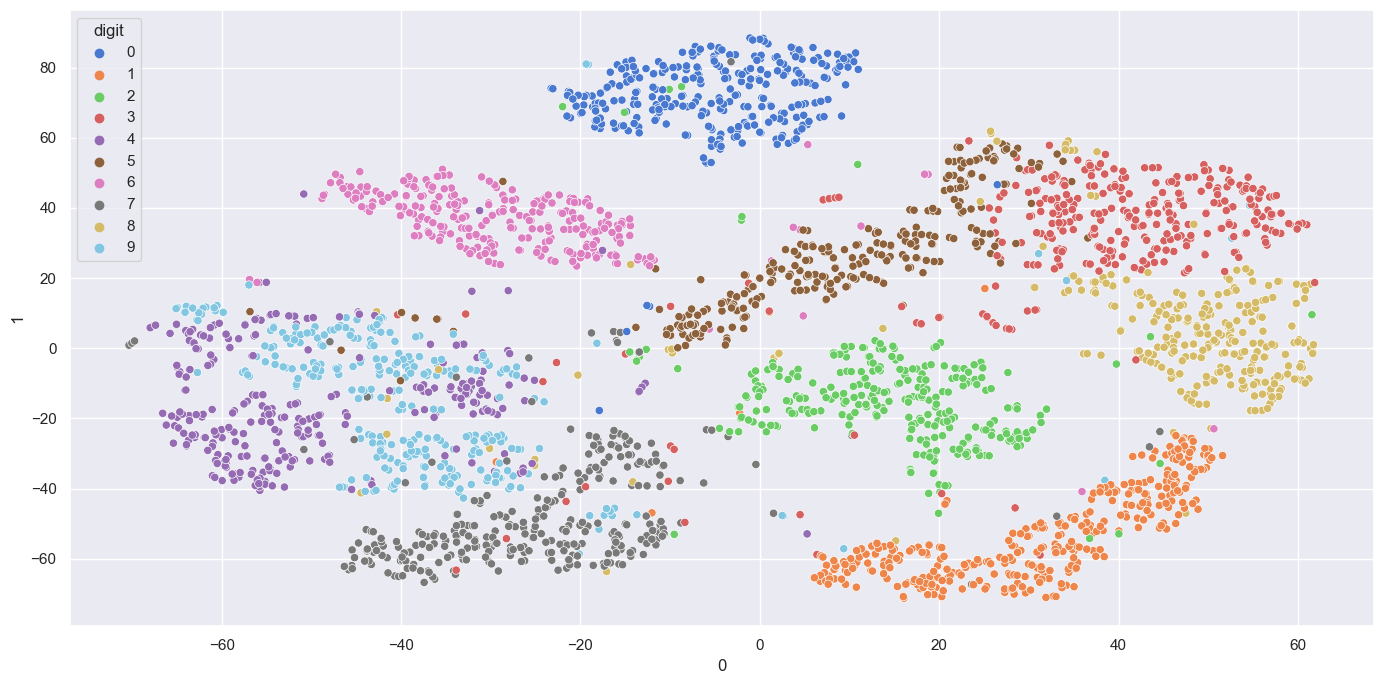

In [3]:
# your code goes here
u2.set_seed(17)
data_mnist_train_sample = data_mnist_train.sample(n=3000)
data_mnist_train_sample_pca = u2.apply_pca(data=data_mnist_train_sample, n_components=40, target_column="digit")
data_mnist_train_sample_tsne = u2.apply_tsne(data=data_mnist_train_sample_pca, n_components=2, target_column="digit", perplexity=20)
u2.plot_points_2d(data=data_mnist_train_sample_tsne, targets=data_mnist_train_sample["digit"],figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Comment on the separability of the MNIST training (sub)set with respect to the downprojection.</li>
    </ul>
</div>

After reducing the dimensionality we can see 9 clusters according to digits target column.

<div class="alert alert-warning">
    <b>Exercise 1.5. [2 Points]</b>
    <ul>
        <li>Given the results above, do you think that there is some model that can classify the data set (decently) well? State your reasoning.</li>
    </ul>
</div>

Yes. Since considering 3000 samples and reducing the dimensionality we got 9 clearly seen clusters we can use the same strategy with the whole data. So, we will be able to classify the data using sclusters we would get. But there are also other factors we have to consider (i.e. model architecture, quality of the data and so on).

<h2>Training of a Neural Network</h2>

Loading and inspecting a new data set is always an exciting moment, but even more exciting is the implementation of a corresponding neural network and applying it to said data set. In this section, you will thus have to implement and train an appropriate neural network model and revisit your knowledge about the <i>forward</i> as well as the <i>backward</i> pass.

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [4]:
def train_and_evaluate(model: torch.nn.Module, optimizer: torch.optim.Optimizer, num_epochs: int,
                       loader_train: torch.utils.data.DataLoader, loader_test: torch.utils.data.DataLoader,
                       device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')) -> None:
    """
    Auxiliary function for training and evaluating a corresponding model.
    
    :param model: model instance to train and evaluate
    :param optimizer: optimizer to use for model training
    :param num_epochs: amount of epochs for model training
    :param loader_train: data loader supplying the training samples
    :param loader_test: data loader supplying the test samples
    :param device: device to use for model training and evaluation
    """
    model.to(device)
    
    for epoch in range(num_epochs):
        # Train model instance for one epoch.
        u2.train_network(
            model=model,
            data_loader=loader_train,
            device=device,
            optimizer=optimizer
        )

        # Evaluate current model instance.
        performance = u2.test_network(
            model=model,
            data_loader=loader_train,
            device=device
        )

        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

    # Evaluate final model on test data set.
    performance = u2.test_network(model=model, data_loader=loader_test, device=device)
    print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

<div class="alert alert-warning">
    <b>Exercise 2.1. [4 Points]</b>
    <ul>
        <li>Create a corresponding <code>TensorDataset</code> for the training as well as the test set.</li>
        <li>Wrap the previously defined <code>TensorDataset</code> instances in separate <code>DataLoader</code> instances with a batch size of $80$ (shuffle the training data set).</li>
        <li>Scale the features of the training as well as test set by a factor of $\frac{1}{255}$, i.e., normalize the data to range $[0; 1]$</li>
    </ul>
</div>

In [5]:
# your code goes here
u2.set_seed(17)
loader_mnist_train = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_train.drop(columns=['digit']).values / 255),  # normalize to range [0; 1]
        torch.from_numpy(data_mnist_train['digit'].values)
    ),
    batch_size=80,
    shuffle=True
)

loader_mnist_test = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(
        torch.from_numpy(data_mnist_test.drop(columns=['digit']).values / 255),  # normalize to range [0; 1]
        torch.from_numpy(data_mnist_test['digit'].values)
    ),
    batch_size=80,
    shuffle=False
)

<div class="alert alert-warning">
    <b>Exercise 2.2. [6 Points]</b>
    <ul>
        <li>Implement a class <code>FNN_0</code> with the following architecture (square weight matrix means that the input size is equal to the output size):</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28 = 784$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$512$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>4</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>6</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>8</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>10</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>11</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [6]:
# your code goes here
u2.set_seed(17)
class FNN_0(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac6 = torch.nn.Sigmoid()
        self.fc7 = torch.nn.Linear(512, 512)
        self.ac8 = torch.nn.Sigmoid()
        self.fc9 = torch.nn.Linear(512, 512)
        self.ac10 = torch.nn.Sigmoid()
        self.fc11 = torch.nn.Linear(512, 10)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac6(x)
        x = self.fc7(x)
        x = self.ac8(x)
        x = self.fc9(x)
        x = self.ac10(x)
        return self.fc11(x)


<div class="alert alert-warning">
    <b>Exercise 2.3. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_0</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.05$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [7]:
# your code goes here
u2.set_seed(17)
fnn_0_model = FNN_0()
optimizer = torch.optim.SGD(fnn_0_model.parameters(), lr=0.05)
print(fnn_0_model)


FNN_0(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac6): Sigmoid()
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (ac8): Sigmoid()
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (ac10): Sigmoid()
  (fc11): Linear(in_features=512, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 2.4. [2 Points]</b>
    <ul>
        <li>Train an <code>FNN_0</code> network for $6$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [8]:
# your code goes here
u2.set_seed(17)
train_and_evaluate(
    model=fnn_0_model,
    optimizer=optimizer,
    num_epochs=6,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test
)

Epoch: 1 / Train loss: 0.0297 / Train accuracy: 0.0983
Epoch: 2 / Train loss: 0.0293 / Train accuracy: 0.0901
Epoch: 3 / Train loss: 0.0294 / Train accuracy: 0.0983
Epoch: 4 / Train loss: 0.0293 / Train accuracy: 0.0982
Epoch: 5 / Train loss: 0.0290 / Train accuracy: 0.1123
Epoch: 6 / Train loss: 0.0290 / Train accuracy: 0.0982

Test loss: 0.0290 / Test accuracy: 0.0982


<div class="alert alert-warning">
    <b>Exercise 2.5. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The training loss is decreasing from 0.0297 to 0.0290, but remains almost the same. That's why Training accuracy is almost unchangeable, but there is a peak while performing the Epoch 5 with the highest value 0.1123, while other values are around 0.09. However, the final test accuracy is still around 0.09 (0.0982 precisely).

<div class="alert alert-warning">
    <b>Exercise 2.6. [3 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>forward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

\begin{equation}
        \hat{y} = g\left(h^{(5)}(h^{(4)}(h^{(3)}(h^{(2)}(h^{(1)}(\mathbf{x};\mathbf{W}_1);\mathbf{W}_2);\mathbf{W}_3);\mathbf{W}_4);\mathbf{W}_5);\mathbf{W}_6 \right )
    \end{equation}


<div class="alert alert-warning">
    <b>Exercise 2.7. [4 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>backward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

 \begin{align*}
\mathbf{W}_6 & \leftarrow \mathbf{W}_6 - \eta \frac{\partial L}{\partial \mathbf{W}_6} \\
        \mathbf{W}_5 & \leftarrow \mathbf{W}_5 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial \mathbf{W}_5} \\
        \mathbf{W}_4 & \leftarrow \mathbf{W}_4 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial \mathbf{W}_4} \\
        \mathbf{W}_3 & \leftarrow \mathbf{W}_3 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial \mathbf{W}_3} \\
        \mathbf{W}_2 & \leftarrow \mathbf{W}_2 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial h^{(2)}}\frac{\partial h^{(2)}}{\partial \mathbf{W}_2} \\
        \mathbf{W}_1 & \leftarrow \mathbf{W}_1 - \eta \frac{\partial L}{\partial h^{(5)}}\frac{\partial h^{(5)}}{\partial h^{(4)}}\frac{\partial h^{(4)}}{\partial h^{(3)}}\frac{\partial h^{(3)}}{\partial h^{(2)}}\frac{\partial h^{(2)}}{\partial h^{(1)}}\frac{\partial h^{(1)}}{\partial \mathbf{W}_1}
    \end{align*}

<h2>Analyzing Gradients</h2>

Is the performance problem of <code>FNN_0</code> related to the vanishing gradient problem? This is exactly the point you're going to figure out in this exercise. As a first step, the gradients of a freshly initialized model need to be collected and analyzed. Afterwards, in case of a vanishing gradient problem, countermeasures must be taken.</p>

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [9]:
def collect_gradients(model: torch.nn.Module, loader: torch.utils.data.DataLoader,
                      device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')) -> Sequence[Dict[str, np.array]]:
    """
    Auxiliary function for collecting gradients of a corresponding model.
    
    :param model: model instance to be used for collecting gradients
    :param loader: data loader supplying the samples used for collecting gradients
    :param device: device to use for gradient collection
    :return: sequence of parameter names and gradients, averaged over all parameter elements
    """
    model.to(device)
    model_state = model.training
    model.train()
    model.zero_grad()
    
    # Iterating over the data set and computing the corresponding gradients.
    # Since we are only interested in the gradients, we can skip the optimization step.
    gradients = {}
    criterion = torch.nn.CrossEntropyLoss()
    
    for data, target in loader:
        data, target = data.float().to(device), target.long().to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    
        # Collecting the (averaged absolute) gradients from the current model.
        for name, parameter in model.named_parameters():
            if "weight" in name and parameter.grad is not None:
                gradients.setdefault(name, []).append(parameter.grad.view(-1).abs().mean().item())
        model.zero_grad()
    
    # Reset model state and return collected gradients.
    model.train(mode=model_state)
    return gradients

<div class="alert alert-warning">
    <b>Exercise 3.1. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_0</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [10]:
# your code goes here
u2.set_seed(17)
fnn_0_fresh_model = FNN_0()
gradients = [(fnn_0_fresh_model, collect_gradients(model=fnn_0_fresh_model, loader=loader_mnist_train))]

<div class="alert alert-warning">
    <b>Exercise 3.2. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly.</li>
    </ul>
</div>

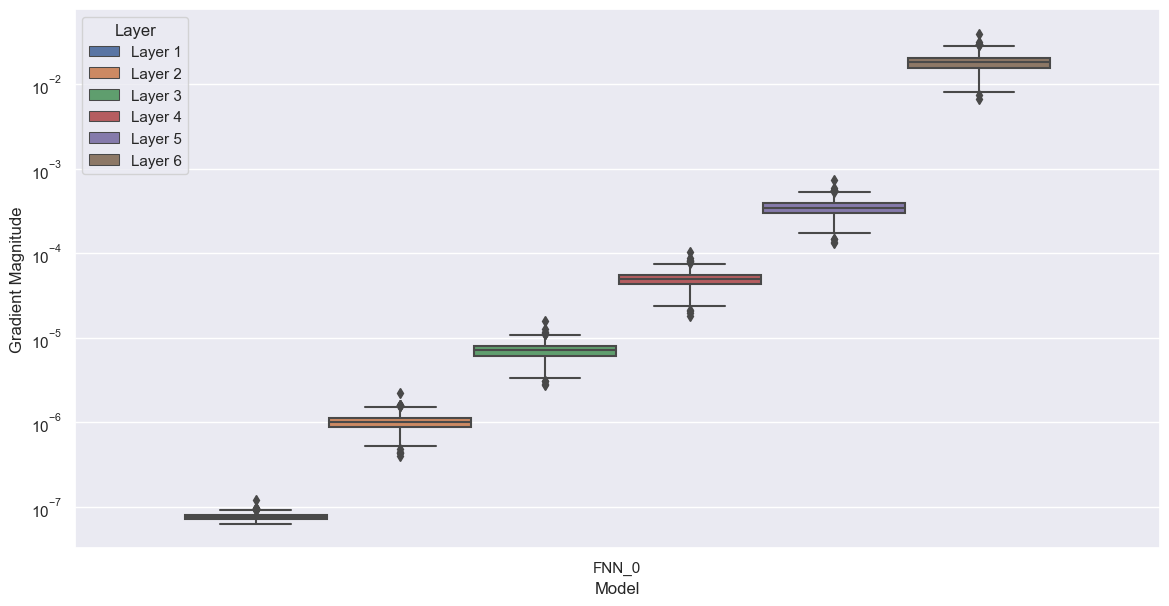

In [11]:
# your code goes here
u2.set_seed(17)
gradient_dfs = []
for model, gradient in gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_df = pd.concat(gradient_dfs)

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot pre-processed gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

There is a vanishing gradient problem. Thus, so many hidden layers are not gonna be that useful.

<div class="alert alert-warning">
    <b>Exercise 3.4. [6 Points]</b>
    <ul>
        <li>Assume a vanishing gradient. Apply the countermeasure presented during the accompanying exercise by implementing a corresponding <code>FNN_1</code> network.</li>
    </ul>
</div>

In [12]:
# your code goes here
u2.set_seed(17)
class FNN_1(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac6 = torch.nn.ReLU()
        self.fc7 = torch.nn.Linear(512, 512)
        self.ac8 = torch.nn.ReLU()
        self.fc9 = torch.nn.Linear(512, 512)
        self.ac10 = torch.nn.ReLU()
        self.fc11 = torch.nn.Linear(512, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac6(x)
        x = self.fc7(x)
        x = self.ac8(x)
        x = self.fc9(x)
        x = self.ac10(x)
        return self.fc11(x)

<div class="alert alert-warning">
    <b>Exercise 3.5. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_1</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.05$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [13]:
# your code goes here
u2.set_seed(17)
fnn_1_model = FNN_1()
optimizer_new = torch.optim.SGD(fnn_1_model.parameters(), lr=0.05)
print(fnn_1_model)

FNN_1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (ac4): ReLU()
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (ac6): ReLU()
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (ac8): ReLU()
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (ac10): ReLU()
  (fc11): Linear(in_features=512, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_1</code> network for $6$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [14]:
# your code goes here
u2.set_seed(17)
u2.set_seed(17)
train_and_evaluate(
    model=fnn_1_model,
    optimizer=optimizer_new,
    num_epochs=6,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test,
    
)

Epoch: 1 / Train loss: 0.0113 / Train accuracy: 0.7064
Epoch: 2 / Train loss: 0.0040 / Train accuracy: 0.9038
Epoch: 3 / Train loss: 0.0052 / Train accuracy: 0.8729
Epoch: 4 / Train loss: 0.0013 / Train accuracy: 0.9686
Epoch: 5 / Train loss: 0.0023 / Train accuracy: 0.9406
Epoch: 6 / Train loss: 0.0008 / Train accuracy: 0.9815

Test loss: 0.0012 / Test accuracy: 0.9695


<div class="alert alert-warning">
    <b>Exercise 3.7. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

Now, train loss decreased sufficiently till the las Epoch (from 0.0113 to 0.0008). Thus, train accuracy has increased as well (from 0.7064 to 0.9815). Final Test loss and Test accuracy improved as well (0.0012 and 0.9695 respectively). Which shows that ReLU activation function is definitely more suitable for our model than the previos Sigmoid one.

<div class="alert alert-warning">
    <b>Exercise 3.8. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_1</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [15]:
# your code goes here
u2.set_seed(17)
fnn_1_fresh_model = FNN_1()
gradients = [(fnn_1_fresh_model, collect_gradients(model=fnn_1_fresh_model, loader=loader_mnist_train))]

<div class="alert alert-warning">
    <b>Exercise 3.9. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

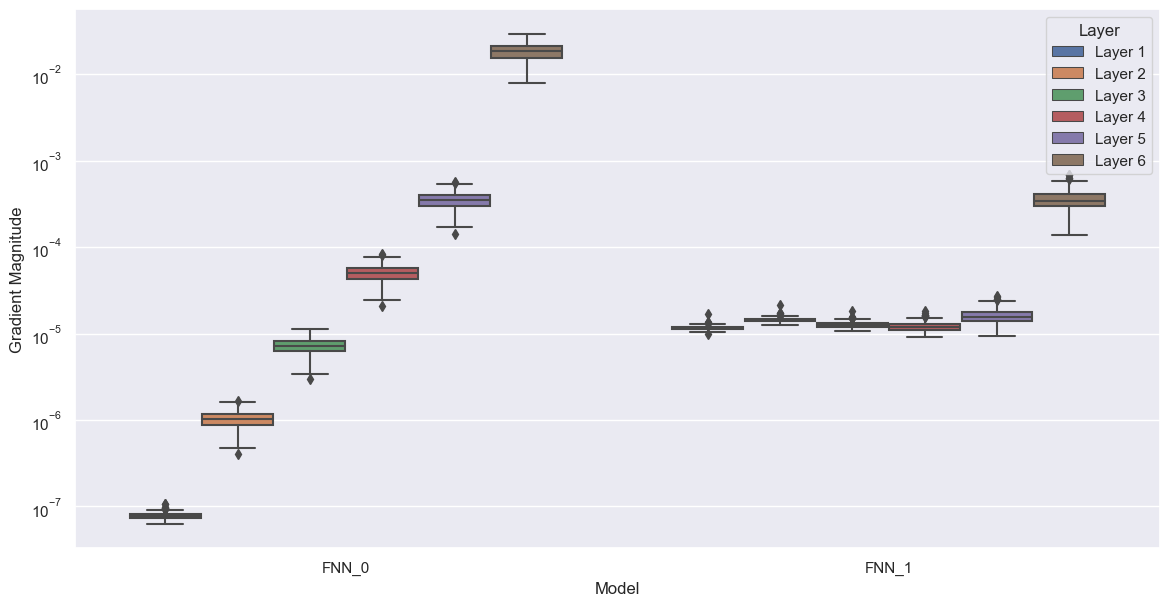

In [16]:
# your code goes here
u2.set_seed(17)
two_gradients = [(fnn_0_fresh_model, collect_gradients(model=fnn_0_fresh_model, loader=loader_mnist_train)),(fnn_1_fresh_model, collect_gradients(model=fnn_1_fresh_model, loader=loader_mnist_train))]
gradient_dfs = []
for model, gradient in two_gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data['Model'] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_df = pd.concat(gradient_dfs)

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot pre-processed gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.10. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

It is visible how the vanishing gradient problem has been resolved in FNN 1 model in comparison to FNN 0 model.

<h2>Deriving Derivatives</h2>

It is already known from the lecture as well as the exercise that <i>activation</i> functions are the primary culprit of the <i>Vanishing Gradient Problem</i>. Hence, it is important to know <i>how</i> the chosen activation functions activate the input and consequently what the <i>derivative</i> is.

<div class="alert alert-warning">
    <b>Exercise 4.1. [4 Points]</b><br>
    Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html#torch.nn.Hardsigmoid">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>hardsigmoid</code> activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>hardsigmoid</code> activation function accordingly.</li>
    </ul>
</div>

In [17]:
# your code goes here
u2.set_seed(17)
def hardsigmoid(x):
    return 0 if x <= -3.0 else 1.0 if x >= 3.0 else x * (1.0 / 6.0) + 0.5

def hardsigmoid_derivative(x):
    return 0 if x >=3 or x<=-3 else 1/6

<div class="alert alert-warning">
    <b>Exercise 4.2. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>hardsigmoid</code> activation function as well as its derivative.</li>
        <li>Plot the <code>hardsigmoid</code> activation function including its derivative for the input range $[-8; 8]$.</li>
    </ul>
</div>

In [18]:
# your code goes here


<div class="alert alert-warning">
    <b>Exercise 4.3. [4 Points]</b><br>
    Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>leaky_relu</code> activation function as it was done for <code>relu</code> in the exercise. Use a <i>negative slope</i> of $0.25$.</li>
        <li>Implement the <i>derivative</i> of the <code>leaky_relu</code> activation function accordingly.</li>
    </ul>
</div>

In [19]:
# your code goes here
u2.set_seed(17)
def leaky_relu(x, negative_slope=0.1):
    return x if x > 0 else negative_slope * x
def leaky_relu_derivative(x, negative_slope=0.1):
    return negative_slope if x <= 0 else 1

<div class="alert alert-warning">
    <b>Exercise 4.4. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>leaky_relu</code> activation function as well as its derivative.</li>
        <li>Plot the <code>leaky_relu</code> activation function including its derivative for the input range $[-8; 8]$.</li>
    </ul>
</div>

In [20]:
# your code goes here
u2.set_seed(17)

<div class="alert alert-warning">
    <b>Exercise 4.5. [2 Points]</b>
    <ul>
        <li>Which of these two activation functions from above do you think is susceptible to the vanishing gradient problem? Explain your decision.</li>
    </ul>
</div>

I would choose LeakyReLU activation function. Analyzing the graphs of 2 functions from PyTorch documentation taking the derivative of hardsigmoid function the values tend to 0 values more than in LeakyReLU function. Thus, the vanishing gradient problem will appear again using hardsigmoid activation function. To my mind, LeakyReLU activation function would be more successful in this case, while the ReLU function should cope with this problem still better.

<div class="alert alert-warning">
    <b>Exercise 4.6. [6 Points]</b>
    <ul>
        <li>Create the same network architecture as <code>FNN_0</code> but replace its activation function with the one you selected above in <b>Exercise 4.5.</b> (the one that is susceptible to the vanishing gradient problem). Name the new network <code>FNN_2</code>.</li>
    </ul>
</div>

In [21]:
# your code goes here
u2.set_seed(17)
class FNN_2(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 512)
        self.ac2 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(512, 512)
        self.ac4 = torch.nn.LeakyReLU()
        self.fc5 = torch.nn.Linear(512, 512)
        self.ac6 = torch.nn.LeakyReLU()
        self.fc7 = torch.nn.Linear(512, 512)
        self.ac8 = torch.nn.LeakyReLU()
        self.fc9 = torch.nn.Linear(512, 512)
        self.ac10 = torch.nn.LeakyReLU()
        self.fc11 = torch.nn.Linear(512, 10)
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac6(x)
        x = self.fc7(x)
        x = self.ac8(x)
        x = self.fc9(x)
        x = self.ac10(x)
        return self.fc11(x)

<div class="alert alert-warning">
    <b>Exercise 4.7. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_2</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [22]:
# your code goes here
u2.set_seed(17)
fnn_2_fresh_model = FNN_2()
gradients = [(fnn_2_fresh_model, collect_gradients(model=fnn_2_fresh_model, loader=loader_mnist_train))]

<div class="alert alert-warning">
    <b>Exercise 4.8. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

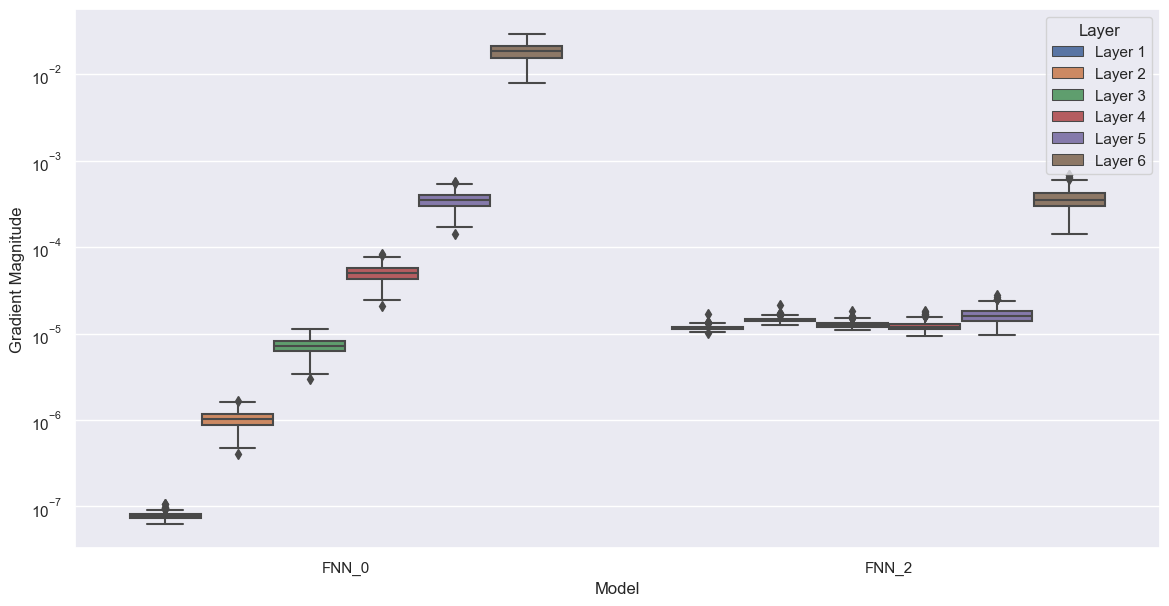

In [23]:
# your code goes here
u2.set_seed(17)
two_gradients = [(fnn_0_fresh_model, collect_gradients(model=fnn_0_fresh_model, loader=loader_mnist_train)),(fnn_2_fresh_model, collect_gradients(model=fnn_2_fresh_model, loader=loader_mnist_train))]
gradient_dfs = []
for model, gradient in two_gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data['Model'] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_df = pd.concat(gradient_dfs)

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(figsize=(14, 7))
ax.set(yscale='log')

# Plot pre-processed gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 4.9. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

I was right choosing LeakyReLU activation function. As we see the problem with vanishing gradient in FNN 2 model was improved a lot in comparison to FNN 0 model. Thus, the LeakyReLU activation function can help to resolve vanishing gradien problem as well as ReLU one.